In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Accuracy

In [63]:
train_dir = 'raf-db-happy-sad-angry-neutral\\train'  # Path ke folder train
val_dir = 'raf-db-happy-sad-angry-neutral\\test'  # Path ke folder test (validasi)

# Cek struktur dataset
print(f"Train folder contains: {os.listdir(train_dir)}")
print(f"Test folder contains: {os.listdir(val_dir)}")

Train folder contains: ['angry', 'happy', 'neutral', 'sad']
Test folder contains: ['angry', 'happy', 'neutral', 'sad']


In [64]:
val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.5
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size = 64,
    shuffle=False,
    class_mode='categorical')

# Analisis distribusi kelas
class_names = list(val_generator.class_indices.keys())

print("\nDistribusi kelas pada data validasi:")
val_labels = val_generator.classes
for label, count in zip(class_names, np.bincount(val_labels)):
    print(f"{label}: {count} sampel")

Found 2505 images belonging to 4 classes.

Distribusi kelas pada data validasi:
angry: 162 sampel
happy: 1185 sampel
neutral: 680 sampel
sad: 478 sampel


In [ ]:
# Load the model
model = load_model("4kelas.keras")

# Evaluate the model on the validation set (val_generator)
test_loss, test_acc = model.evaluate(val_generator)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.2f}")


c:\Users\Sanju\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9015 - loss: 0.5175
Test accuracy: 0.90


40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 907ms/step


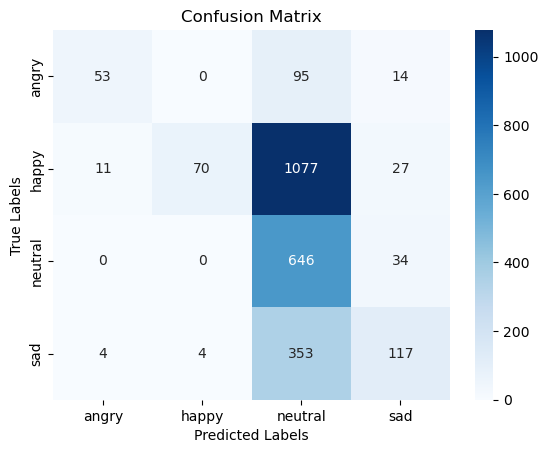

              precision    recall  f1-score   support

       angry       0.78      0.33      0.46       162
       happy       0.95      0.06      0.11      1185
     neutral       0.30      0.95      0.45       680
         sad       0.61      0.24      0.35       478

    accuracy                           0.35      2505
   macro avg       0.66      0.40      0.34      2505
weighted avg       0.69      0.35      0.27      2505



In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mendapatkan prediksi dari generator validasi
y_true = val_generator.classes  # Label asli
y_pred = model.predict(val_generator)  # Probabilitas prediksi
y_pred_classes = np.argmax(y_pred, axis=1)  # Kelas prediksi

# Menampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Path ke folder uji
test_folder_path = 'raf-db-happy-sad-angry-neutral\\test\\neutral'  # Ganti dengan folder uji Anda

# Mapping indeks ke nama kelas
class_names = ['angry', 'happy', 'neutral', 'sad']  # Ubah sesuai kelas Anda

# Inisialisasi hitungan untuk setiap kelas
class_counts = {class_name: 0 for class_name in class_names}

# Fungsi untuk memprediksi gambar
def predict_image(image_path):
    image = cv2.imread(image_path)  # Baca gambar
    image_resized = cv2.resize(image, (100, 100))  # Resize ke ukuran input VGG16
    image_array = np.expand_dims(image_resized, axis=0)  # Tambahkan batch dimension
    image_array = image_array / 255.0  # Normalisasi
    predictions = model.predict(image_array, verbose=0)  # Matikan progress bar
    predicted_class = np.argmax(predictions)
    return class_names[predicted_class]

# Iterasi melalui folder
for file_name in os.listdir(test_folder_path):
    file_path = os.path.join(test_folder_path, file_name)
    if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Cek apakah file adalah gambar
        predicted_emotion = predict_image(file_path)
        class_counts[predicted_emotion] += 1  # Update hitungan untuk kelas yang diprediksi

# Print hasil prediksi untuk setiap kelas
for class_name, count in class_counts.items():
    print(f"Predicted {class_name}: {count}")

Predicted angry: 5
Predicted happy: 17
Predicted neutral: 615
Predicted sad: 43


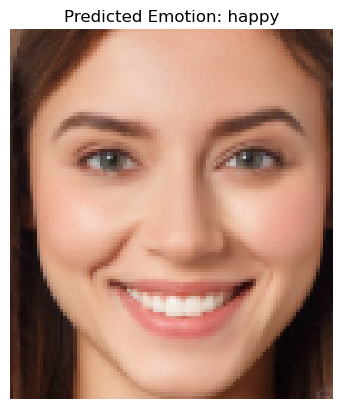

In [ ]:
# Path ke gambar yang akan diprediksi
model = load_model("4kelas.keras")

image_path = 'image3.png' 

# Mapping indeks ke nama kelas
class_names = ['angry', 'happy', 'neutral', 'sad']  

# Fungsi untuk memprediksi gambar
def predict_image(image_path):
    image = cv2.imread(image_path)  
    image_resized = cv2.resize(image, (100, 100))  # Resize ke ukuran input model
    image_array = np.expand_dims(image_resized, axis=0) 
    image_array = image_array / 255.0  # Normalisasi gambar
    predictions = model.predict(image_array, verbose=0)  # Prediksi gambar
    predicted_class = np.argmax(predictions)  # Ambil kelas dengan probabilitas tertinggi
    return class_names[predicted_class], image  # Kembalikan nama kelas dan gambar asli

# Prediksi gambar
predicted_emotion, image = predict_image(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off') 
plt.show()